Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Case Study on Yield Curve Changes Using PCA

**Name:** József Soltész

**Email address associated with your DataCamp account:** [solteszjozsef@gmail.com](mailto:solteszjozsef@gmail.com)

**GitHub username:** solteszjozsef

**Project description**: This will be read by the students on the DataCamp platform **before** deciding to start the project. The description should be three paragraphs, written in Markdown.

- The level and the shape of the yield curve is ...
- BACKGROUND KNOWLEDGE
- The historical yield curve data are from Quandl, from this site: [https://www.quandl.com/data/FED/SVENY](https://www.quandl.com/data/FED/SVENY)


***--------------------------------------------EZT ÚJRA KELL MÉG ÍRNOM!!!--------------------------------------------***

- This projects assumes background knowledge on data manipulation concepts and data visualization, focusing on the packages **tidyr** and **ggplot2**. It is advantageous to have some experience regarding fixed income financial products, mainly the meaning of principal amounts and cash-flows.
- Due to the lack of publicly available data of a company's or fund's bond trades, a sample dataset will be used for the project.

***--------------------------------------------EZT ÚJRA KELL MÉG ÍRNOM!!!--------------------------------------------***





***TO BE DELETED LATER***

- *Paragraph 1 should be an exciting introduction to analysis/model/etc. students will complete.*
- *Paragraph 2 should list the background knowledge you assume the student doing this project will have, the more specific the better. Please list things like modules, tools, functions, methods, statistical concepts, etc.*
- *Paragraph 3 should describe and link to (if possible) the dataset used in the project.*

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Introduction to the yield curve

In this notebook we will analyse the nature of yield curve changes. In finance the yield of a financial debt instrument shows the potential return on it, for example, if a bond trades at 10%, then an investors expects that her money will be 10% more in a year. If we take several similar debt instruments with different maturities (like 2 months, 3 years, 10 years), we get the yield curve. 

Financial analysts, economists and risk managers are also interested in the level, shape and volatility of the yield curve for different reasons. The financial analysts make investment decisions based on the expected returns and risks. Economists are very much interested in the shape of the yield as it might indicate changes in the business cycles. Risk managers mostly measury the volatility of yields and use this as an input to estimate portfolio risks.

![](img/640px-U.S._Treasury_Yield_Curves_-_v1.png)

Link to the picture: [https://commons.wikimedia.org/wiki/File:U.S._Treasury_Yield_Curves_-_v1.png](https://commons.wikimedia.org/wiki/File:U.S._Treasury_Yield_Curves_-_v1.png)

In this notebook we will explore the structure of daily yield curve changes using (Principal Component Analysis) PCA technique. It will shine a light upon how the yield curve typically behave. The dataset we will use is [FED yield curve imported from Quandl](https://www.quandl.com/data/FED/SVENY).


In [52]:
# 1. Load the tidyverse package using the library function.
library(tidyverse)

# 2. Import the data from “FED-SVENY.csv” into a variable named yield_curve.
yield_curve <- read_csv("datasets/FED-SVENY.csv")

# 3. Then take a look at the first and the final rows.
head(yield_curve)
tail(yield_curve)

Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = "")
)
See spec(...) for full column specifications.


Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
2018-11-23,2.6955,2.7944,2.8171,2.8419,2.8750,2.9133,2.9532,2.9923,3.0291,...,3.2720,3.2817,3.2906,3.2988,3.3064,3.3133,3.3198,3.3258,3.3314,3.3366
2018-11-21,2.7041,2.8048,2.8325,2.8590,2.8922,2.9299,2.9689,3.0070,3.0430,...,3.2814,3.2910,3.2998,3.3079,3.3154,3.3223,3.3286,3.3346,3.3401,3.3452
2018-11-20,2.6814,2.7900,2.8305,2.8551,2.8816,2.9132,2.9488,2.9860,3.0227,...,3.2811,3.2915,3.3011,3.3098,3.3178,3.3252,3.3321,3.3385,3.3444,3.3500
2018-11-19,2.6736,2.7728,2.8181,2.8480,2.8772,2.9096,2.9447,2.9811,3.0173,...,3.2861,3.2974,3.3077,3.3172,3.3259,3.3340,3.3415,3.3484,3.3549,3.3609
2018-11-16,2.6854,2.8044,2.8469,2.8718,2.8986,2.9309,2.9673,3.0051,3.0423,...,3.2990,3.3092,3.3185,3.3271,3.3349,3.3422,3.3489,3.3552,3.3610,3.3664
2018-11-15,2.7156,2.8451,2.8799,2.9056,2.9357,2.9702,3.0066,3.0430,3.0781,...,3.3268,3.3372,3.3468,3.3557,3.3638,3.3714,3.3784,3.3849,3.3909,3.3966


Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1961-06-21,2.9993,3.4236,3.6132,3.7107,3.7694,3.8085,3.8364,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-20,2.9833,3.4101,3.5986,3.6952,3.7533,3.7921,3.8198,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-19,2.9949,3.4386,3.6252,3.7199,3.7768,3.8147,3.8418,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-16,3.0012,3.4142,3.5994,3.6953,3.7531,3.7917,3.8192,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-15,2.9941,3.4137,3.5981,3.6930,3.7501,3.7882,3.8154,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-14,2.9825,3.3771,3.5530,3.6439,3.6987,3.7351,3.7612,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## 2. Filtering the data

This data set contains the yield curves by tenors ranging from 1 year to 30 years. 

Unfortunately before 25/11/1985 it does not have all the tenors so you have to filter them out.

Warning message:
"Removed 15 rows containing missing values (geom_path)."

min(Date),max(Date)
1985-11-25,2018-11-23


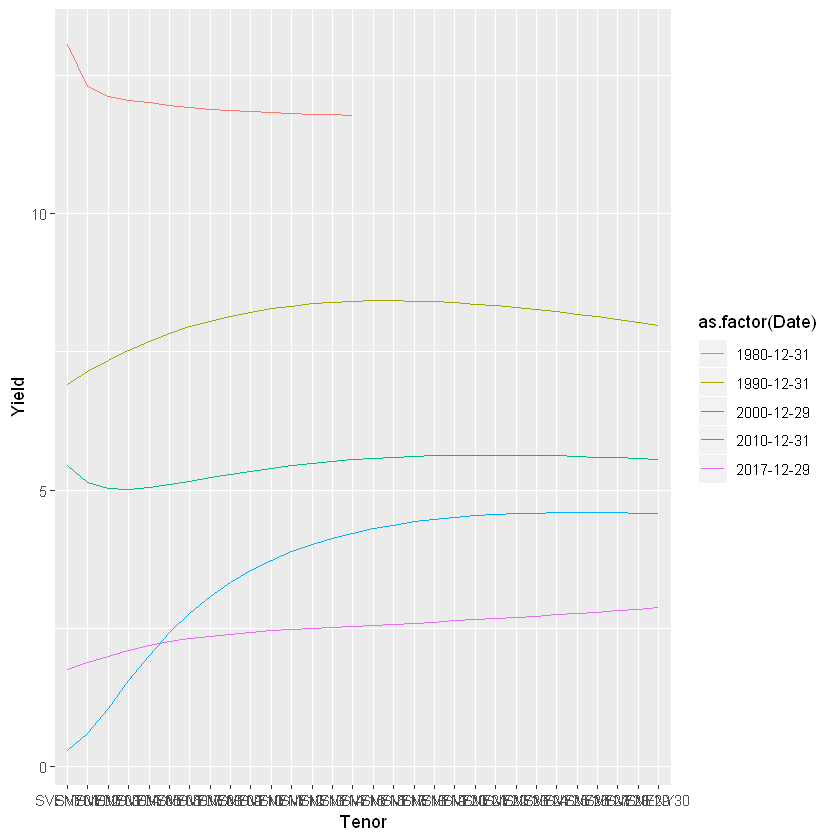

In [67]:
require(reshape2)
yc_some_dates <- yield_curve %>% filter(Date %in% as.Date(c("1980-12-31", "1990-12-31", "2000-12-29", "2010-12-31", "2017-12-29"))) %>% melt(id.vars = 'Date', variable.name = 'Tenor', value.name = 'Yield')
#yc_some_dates
ggplot(yc_some_dates, aes(x = Tenor, y = Yield, col = as.factor(Date), group = Date)) + geom_line()

# 1. Filter for the rows with date after 25/11/1985.
yield_curve_2 <- yield_curve %>% filter(Date >= "1985-11-25")

# 2. Get the first and the last dates in order to check the filtering
yield_curve_2 %>% summarize(min(Date), max(Date))




## 3. Generating daily changes

A financial analyst is interested not only in the level of the yield curve but the changes in it. Both are interesting things to analyse, from the financial viewpoint the main difference between them is the following:

* The level of yields determine the value of the bonds thus the whole portfolio
* The yield changes are the factors that lead to the variation of portfolio market value. Their nature is also the nature of risks to portfolio value.

In [8]:
# 1. Calculate the daily yield changes. Take the following steps:
# a. Arrange the dataset by Date in ascending order.
# b. Use the mutate_if to calculate the differences for all tenors. The first argument is a condition for the columns to be mutated. The second argument is formula for the new variable. use the dot (.) for specifing the variable in the formula.
# c. Use the filter_all in order to filter out the observations with NA value. It will be the first row, because there is no lag value for this row. 
yc_change <- 
  yield_curve %>% 
  arrange(Date) %>% 
  mutate_if(is.numeric,funs(.-lag(.))) %>% 
  filter_all(all_vars(!is.na(.)))

# 2. View the first few rows.
head(yc_change)

Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1985-11-26,-0.0024,-0.0051,-0.0049,-0.0032,-0.0009,0.0013,0.0032,0.0044,0.0050,...,-0.0324,-0.0369,-0.0414,-0.0458,-0.0502,-0.0544,-0.0585,-0.0625,-0.0664,-0.0701
1985-11-27,-0.0102,-0.0053,-0.0081,-0.0145,-0.0224,-0.0301,-0.0370,-0.0427,-0.0470,...,-0.0340,-0.0313,-0.0286,-0.0259,-0.0233,-0.0209,-0.0185,-0.0163,-0.0141,-0.0121
1985-11-29,-0.0511,-0.0374,-0.0348,-0.0379,-0.0429,-0.0481,-0.0525,-0.0555,-0.0573,...,-0.0359,-0.0342,-0.0327,-0.0315,-0.0303,-0.0294,-0.0286,-0.0279,-0.0273,-0.0268
1985-12-02,0.0262,0.0309,0.0368,0.0442,0.0526,0.0615,0.0705,0.0790,0.0868,...,0.1058,0.1034,0.1008,0.0981,0.0952,0.0923,0.0894,0.0865,0.0836,0.0807
1985-12-03,0.0351,0.0222,0.0181,0.0182,0.0196,0.0208,0.0208,0.0194,0.0165,...,-0.0729,-0.0804,-0.0876,-0.0945,-0.1010,-0.1072,-0.1131,-0.1187,-0.1241,-0.1291
1985-12-04,-0.0034,-0.0184,-0.0304,-0.0398,-0.0465,-0.0510,-0.0537,-0.0547,-0.0546,...,-0.0239,-0.0214,-0.0189,-0.0167,-0.0146,-0.0125,-0.0106,-0.0088,-0.0070,-0.0054


*Stop here! Only the three first tasks. :)*

## 4. To be continued...

Planned tasks:
4. Standard deviations of tenors
5. Correlation structure
6. Estimating principal components
7. Prepare for plotting
8. Plotting the components of yield changes
9. Conclusion